In [2]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use("ggplot")
%matplotlib inline

import io
import csv
import pandas as pd

In [3]:
datum = io.StringIO("""
pow, N, tot_time(s), scaled_time(us)
2, 100, 0.02, 1.59
3, 1000, 0.05, 0.53
4, 10000, 0.37, 0.37
5, 100000, 4.60, 0.46
6, 1000000, 53.39, 0.53
""".strip())
skLL = pd.read_csv(datum, names=["power", "N", "tot", "scaled"], skiprows=1)


In [4]:
skLL

,power,N,tot,scaled
0,2,100,0.02,1.59
1,3,1000,0.05,0.53
2,4,10000,0.37,0.37
3,5,100000,4.60,0.46
4,6,1000000,53.39,0.53


Text(0,0.5,'Runtime per iteration (us)')

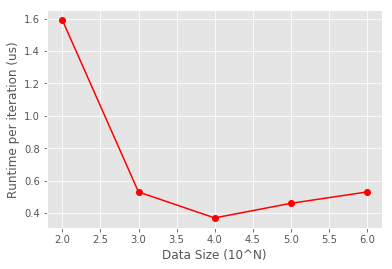

In [5]:
plt.plot(skLL.power, skLL.scaled, 'ro-')
plt.xlabel("Data Size (10^N)")
plt.ylabel("Runtime per iteration (us)")


In [6]:
simpleLLdatum = io.StringIO("""
pow, N, tot_time(s), scaled_time (us)
2, 100, 0.35, 34.58
3, 1000, 3.45, 34.53
4, 10000, 34.22, 34.22
5, 100000, 344.93, 34.49
6, 1000000, 3474.57, 34.75
""".strip())
simpleLL = pd.read_csv(simpleLLdatum, names=["power", "N", "tot", "scaled"], skiprows=1)
simpleLL

,power,N,tot,scaled
0,2,100,0.35,34.58
1,3,1000,3.45,34.53
2,4,10000,34.22,34.22
3,5,100000,344.93,34.49
4,6,1000000,3474.57,34.75


In [8]:
gpuDatum = io.StringIO("""
# pow, N, tot_time(s), scaled_time (us)
2, 100, 0.12, 12.44
3, 1000, 0.02, 0.16
4, 10000, 0.02, 0.02
5, 100000, 0.13, 0.01
6, 1000000, 1.07, 0.01
""".strip())
gpuLL = pd.read_csv(gpuDatum, names=["power", "N", "tot", "scaled"], skiprows=1)
gpuLL

,power,N,tot,scaled
0,2,100,0.12,12.44
1,3,1000,0.02,0.16
2,4,10000,0.02,0.02
3,5,100000,0.13,0.01
4,6,1000000,1.07,0.01


Text(0,0.5,'Total runtime/N (us)')

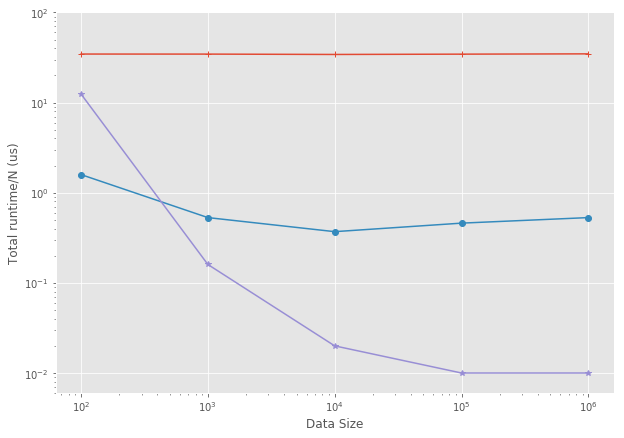

In [20]:
plt.figure(figsize=(10,7))
plt.loglog(simpleLL.N, simpleLL.scaled, '+-')
plt.loglog(skLL.N, skLL.scaled, 'o-')
plt.loglog(gpuLL.N, gpuLL.scaled, '*-')
plt.ylim((0.006, 100))
plt.xlabel("Data Size")
plt.ylabel("Total runtime/N (us)")

In [21]:
simpleLL.tot

0       0.35
1       3.45
2      34.22
3     344.93
4    3474.57
Name: tot, dtype: float64

In [ ]:
0       0.35
1       3.45
2      34.22
3     344.93
4    3474.57